In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

# 1. Import Data

In [3]:
# import data from csv
df_brfss = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_brfss.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
print(df_brfss.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [5]:
# standardizing column names
df_brfss.columns = df_brfss.columns.str.strip().str.lower().str.replace(' ','_').str.replace('-','_')

In [6]:
print(df_brfss.columns)

Index(['diabetes_binary', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')


In [7]:
print("BRFSS shape", df_brfss.shape)
print("Missing\n", df_brfss.isna().sum())

BRFSS shape (70692, 22)
Missing
 diabetes_binary         0
highbp                  0
highchol                0
cholcheck               0
bmi                     0
smoker                  0
stroke                  0
heartdiseaseorattack    0
physactivity            0
fruits                  0
veggies                 0
hvyalcoholconsump       0
anyhealthcare           0
nodocbccost             0
genhlth                 0
menthlth                0
physhlth                0
diffwalk                0
sex                     0
age                     0
education               0
income                  0
dtype: int64


In [8]:
print("Data types:\n", df_brfss.dtypes)

Data types:
 diabetes_binary         float64
highbp                  float64
highchol                float64
cholcheck               float64
bmi                     float64
smoker                  float64
stroke                  float64
heartdiseaseorattack    float64
physactivity            float64
fruits                  float64
veggies                 float64
hvyalcoholconsump       float64
anyhealthcare           float64
nodocbccost             float64
genhlth                 float64
menthlth                float64
physhlth                float64
diffwalk                float64
sex                     float64
age                     float64
education               float64
income                  float64
dtype: object


In [9]:
# distribution of classes in dataset
print(df_brfss['diabetes_binary'].value_counts())
print(df_brfss['diabetes_binary'].value_counts(normalize=True))

diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [10]:
df_brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diabetes_binary       70692 non-null  float64
 1   highbp                70692 non-null  float64
 2   highchol              70692 non-null  float64
 3   cholcheck             70692 non-null  float64
 4   bmi                   70692 non-null  float64
 5   smoker                70692 non-null  float64
 6   stroke                70692 non-null  float64
 7   heartdiseaseorattack  70692 non-null  float64
 8   physactivity          70692 non-null  float64
 9   fruits                70692 non-null  float64
 10  veggies               70692 non-null  float64
 11  hvyalcoholconsump     70692 non-null  float64
 12  anyhealthcare         70692 non-null  float64
 13  nodocbccost           70692 non-null  float64
 14  genhlth               70692 non-null  float64
 15  menthlth           

In [11]:
df_brfss.describe()

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## General

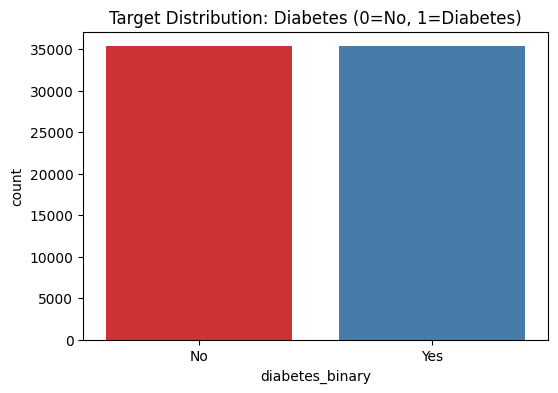

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_brfss, x="diabetes_binary", hue="diabetes_binary", palette="Set1", legend=False)
ax.set_xticks([0,1])
ax.set_xticklabels(['No','Yes'])
plt.title("Target Distribution: Diabetes (0=No, 1=Diabetes)")
plt.show()

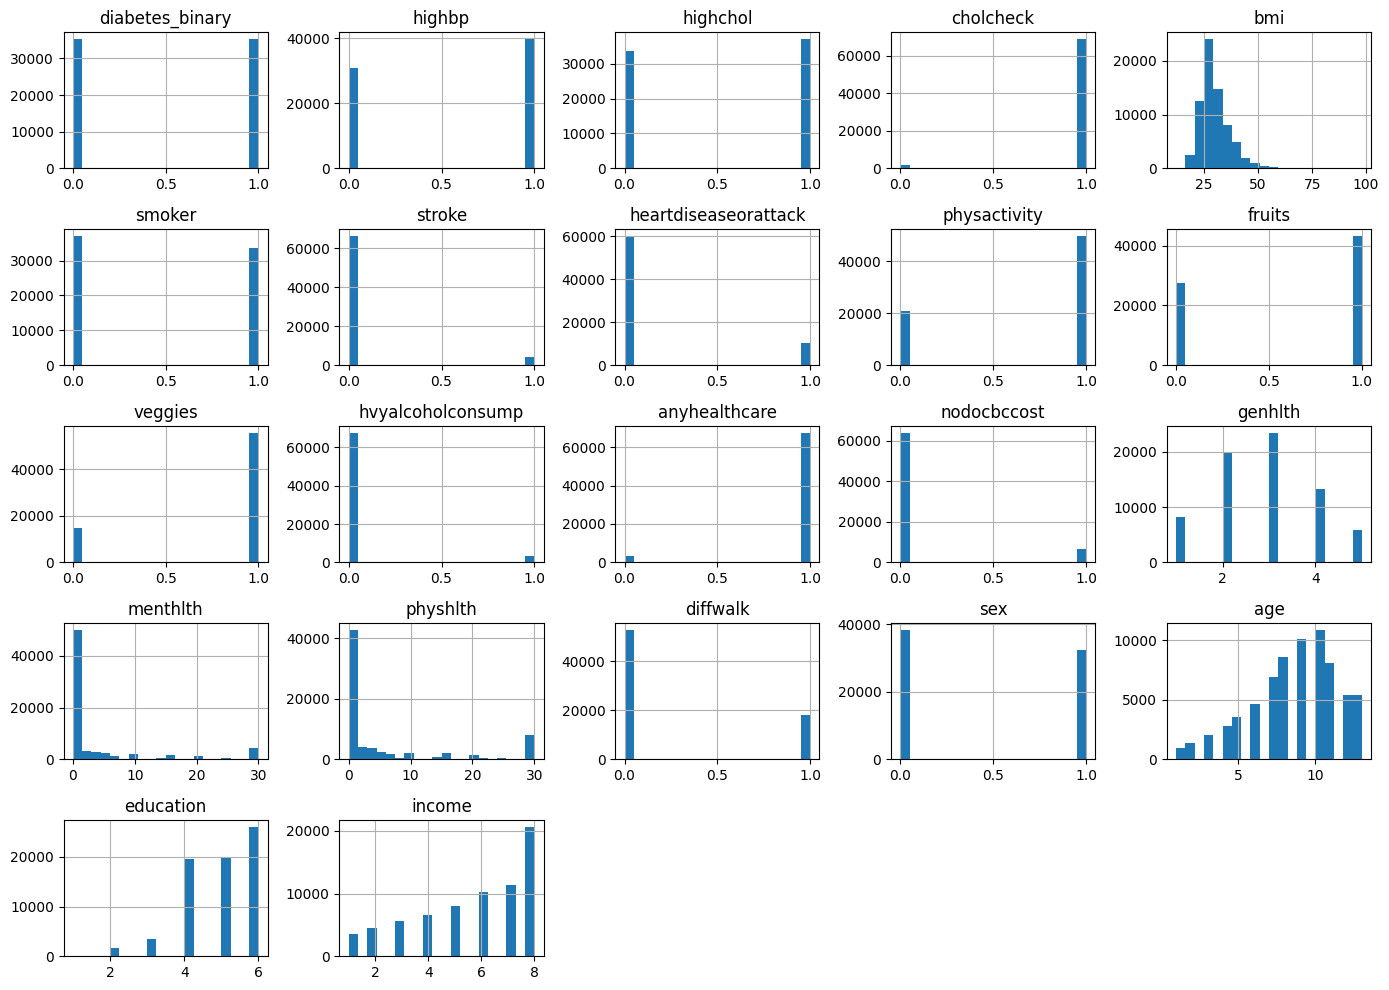

In [13]:
num_cols = df_brfss.select_dtypes(include=[np.number]).columns.tolist()

# histograms for variables
df_brfss[num_cols].hist(figsize=(14,10), bins=20)
plt.tight_layout()

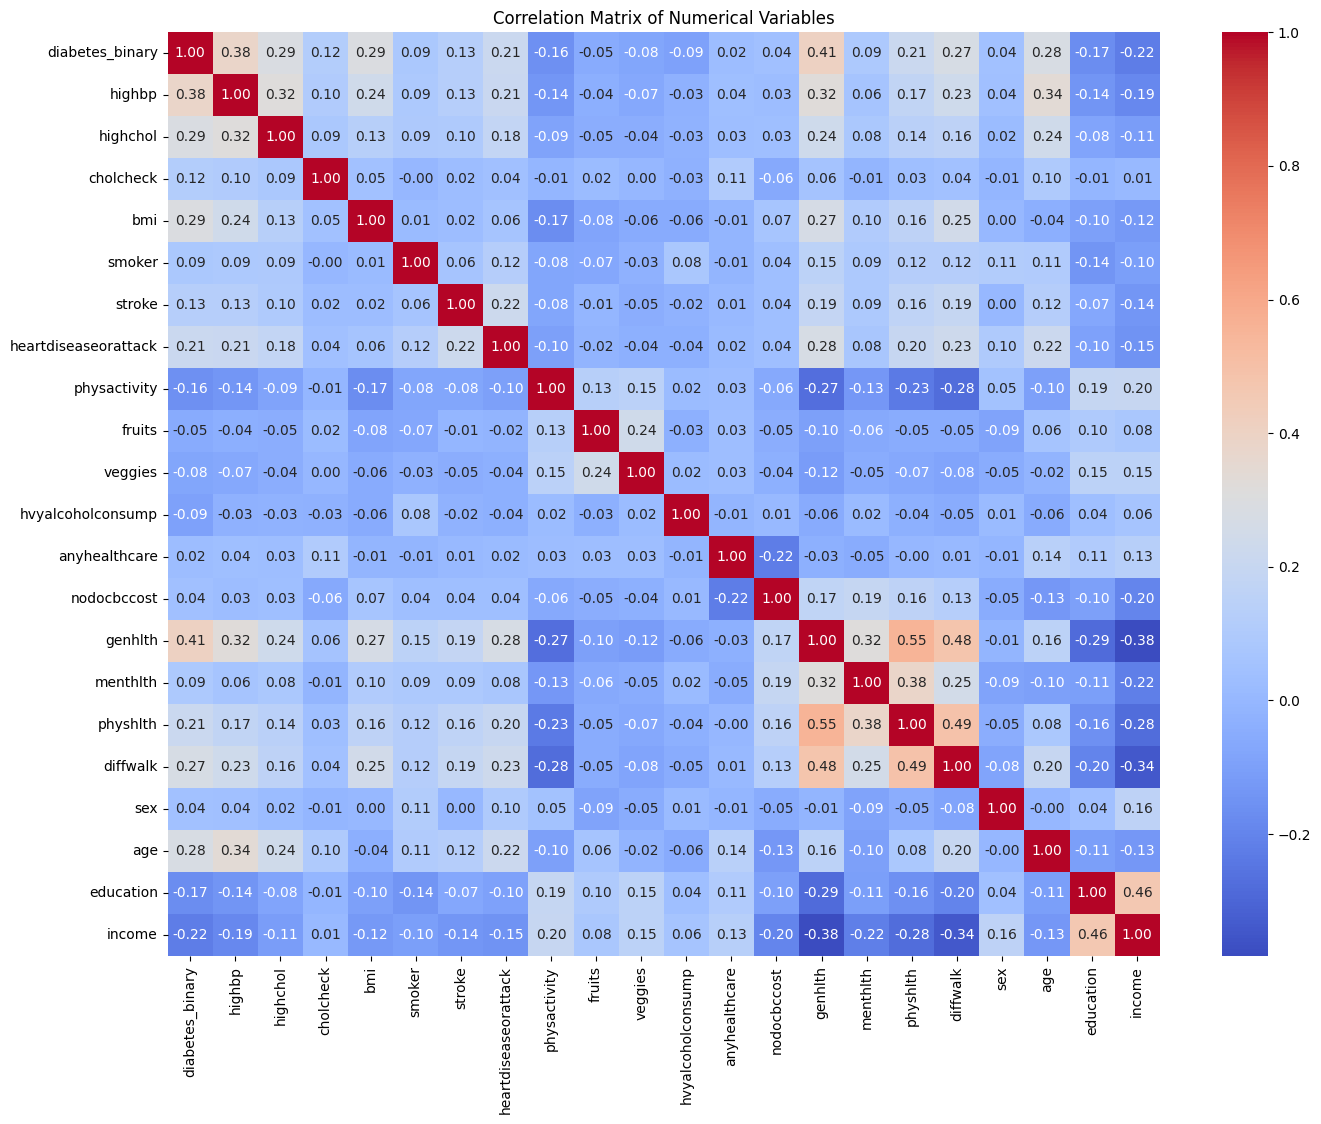

In [14]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_brfss[num_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## H3: Does accessibility to healthcare have an impact on diabetes?
Reject

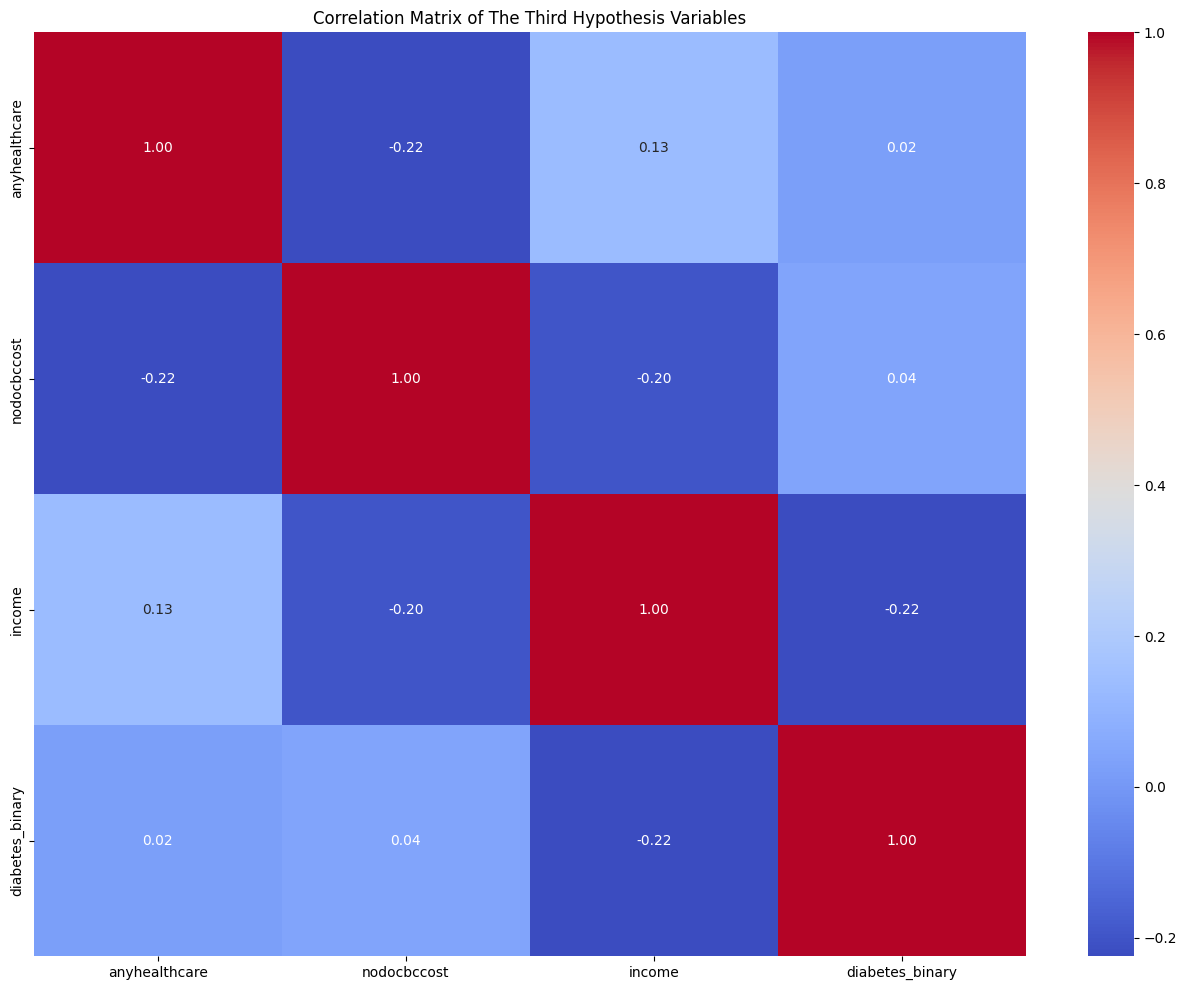

In [15]:
# The needed columns for the third hypothesis
hypo3_cols = ["anyhealthcare","nodocbccost","income","diabetes_binary"]

# Calculate the correlation matrix for the first hypothesis
correlation_matrix3 = df_brfss[hypo3_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of The Third Hypothesis Variables')
plt.show()

<Figure size 1000x600 with 0 Axes>

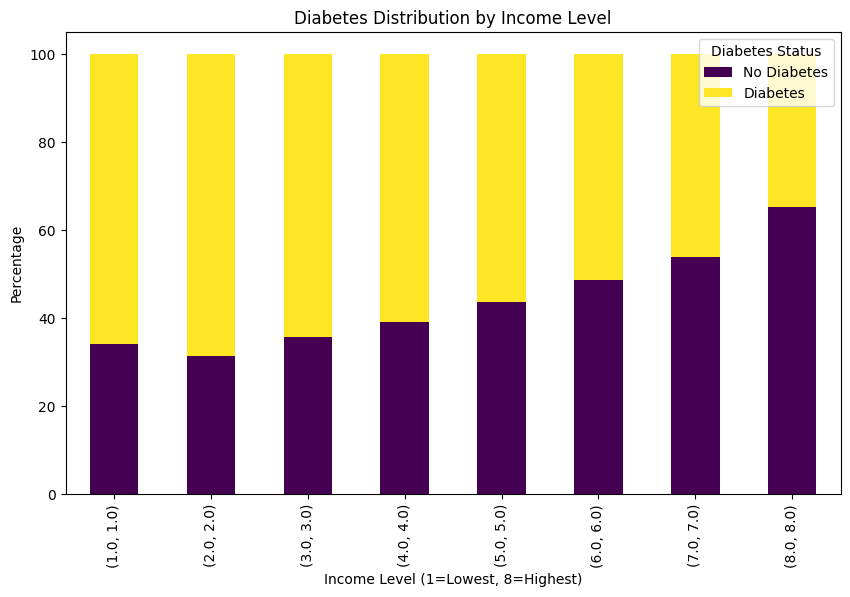

In [16]:
# Income vs Diabetes (Stacked % Bar Plot)
plt.figure(figsize=(10,6))
income_counts = (
    df_brfss.groupby(["income", "diabetes_binary"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())  # convert to %
    .unstack()
)

income_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Diabetes Distribution by Income Level")
plt.ylabel("Percentage")
plt.xlabel("Income Level (1=Lowest, 8=Highest)")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.show()

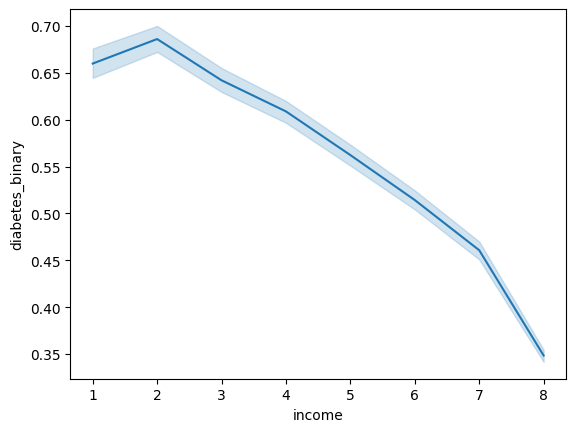

In [17]:
# Income vs Diabetes Line Plot
ax = sns.lineplot(data=df_brfss, x="income", y="diabetes_binary")


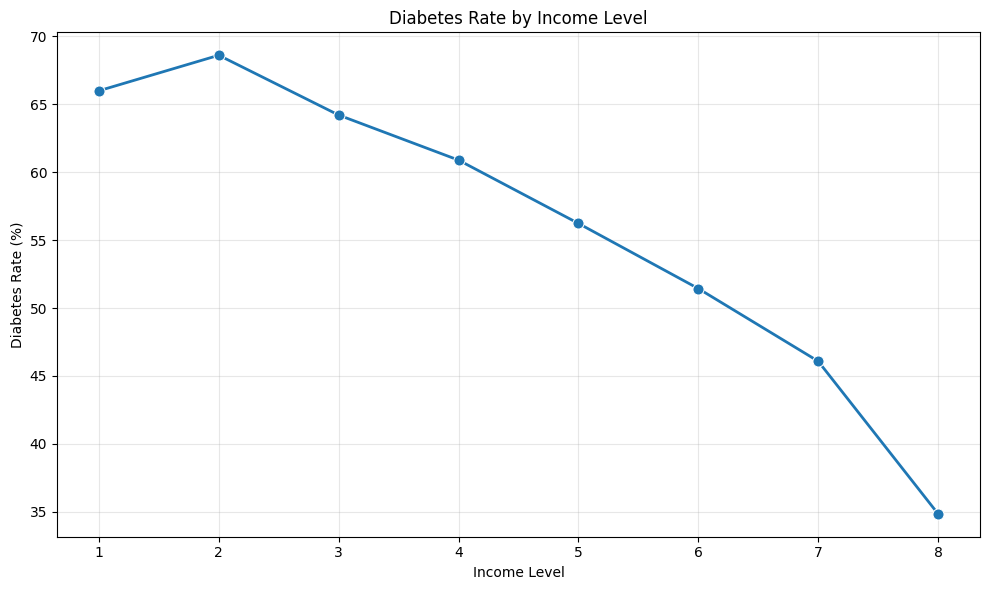

In [18]:
plt.figure(figsize=(10,6))
diabetes_rate = df_brfss.groupby("income")["diabetes_binary"].mean() * 100

ax = sns.lineplot(x=diabetes_rate.index, y=diabetes_rate.values, marker='o', linewidth=2, markersize=8)
#ax.set_xticks([1,2,3,4,5,6,7,8])
#ax.set_xticklabels(['0','10000','15000','20000','25000','35000','50000','75000'])
plt.title("Diabetes Rate by Income Level")
plt.ylabel("Diabetes Rate (%)")
plt.xlabel("Income Level")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

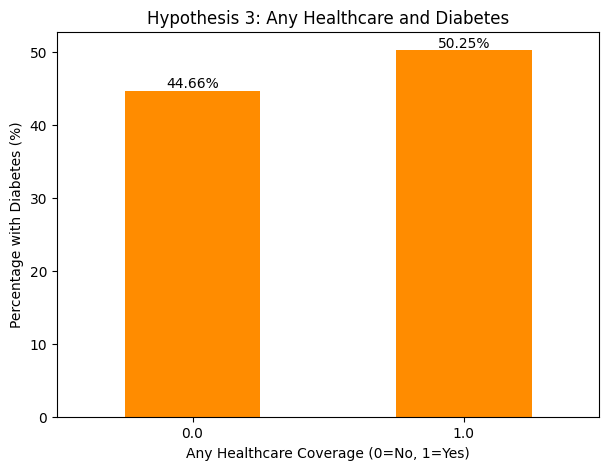

In [19]:
# H3: Insurance vs Diabetes
plt.figure(figsize=(7,5))
diabetes_rate = df_brfss.groupby('anyhealthcare')['diabetes_binary'].mean() * 100

ax = diabetes_rate.plot(kind='bar', color="darkorange")
plt.title("Hypothesis 3: Any Healthcare and Diabetes")
plt.xlabel("Any Healthcare Coverage (0=No, 1=Yes)")
plt.ylabel("Percentage with Diabetes (%)")
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')


plt.show()

<Figure size 1000x600 with 0 Axes>

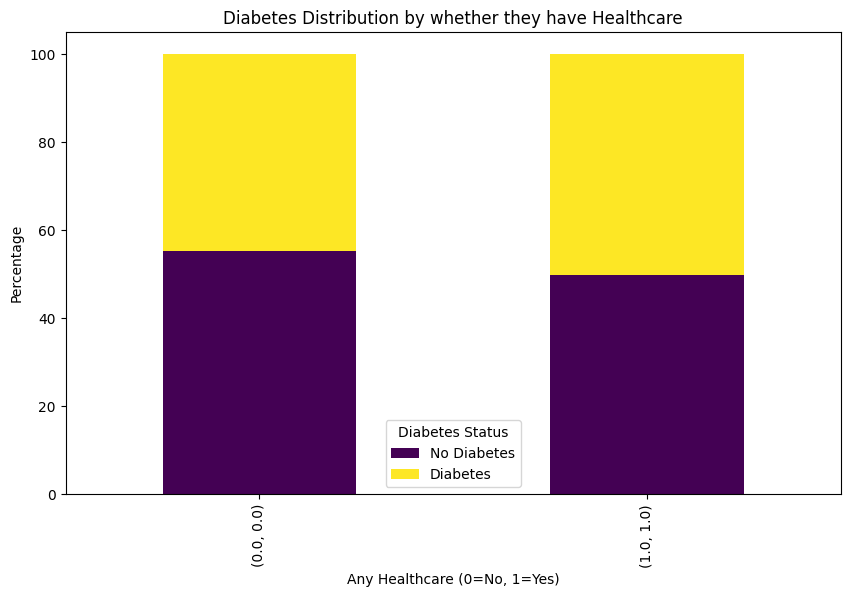

In [20]:
# AnyHealthcare vs Diabetes (Stacked % Bar Plot)
plt.figure(figsize=(10,6))
income_counts = (
    df_brfss.groupby(["anyhealthcare", "diabetes_binary"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())  # convert to %
    .unstack()
)

income_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Diabetes Distribution by whether they have Healthcare")
plt.ylabel("Percentage")
plt.xlabel("Any Healthcare (0=No, 1=Yes)")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.show()

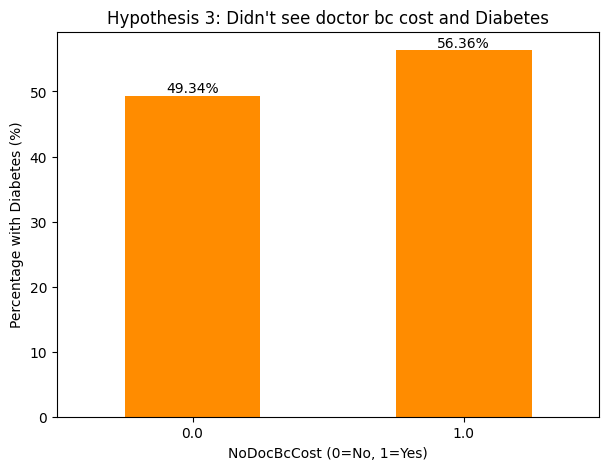

In [21]:
# H3: NoDocBcCost vs Diabetes
plt.figure(figsize=(7,5))
diabetes_rate = df_brfss.groupby('nodocbccost')['diabetes_binary'].mean() * 100

ax = diabetes_rate.plot(kind='bar', color="darkorange")
plt.title("Hypothesis 3: Didn't see doctor bc cost and Diabetes")
plt.xlabel("NoDocBcCost (0=No, 1=Yes)")
plt.ylabel("Percentage with Diabetes (%)")
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')


plt.show()

<Figure size 1000x600 with 0 Axes>

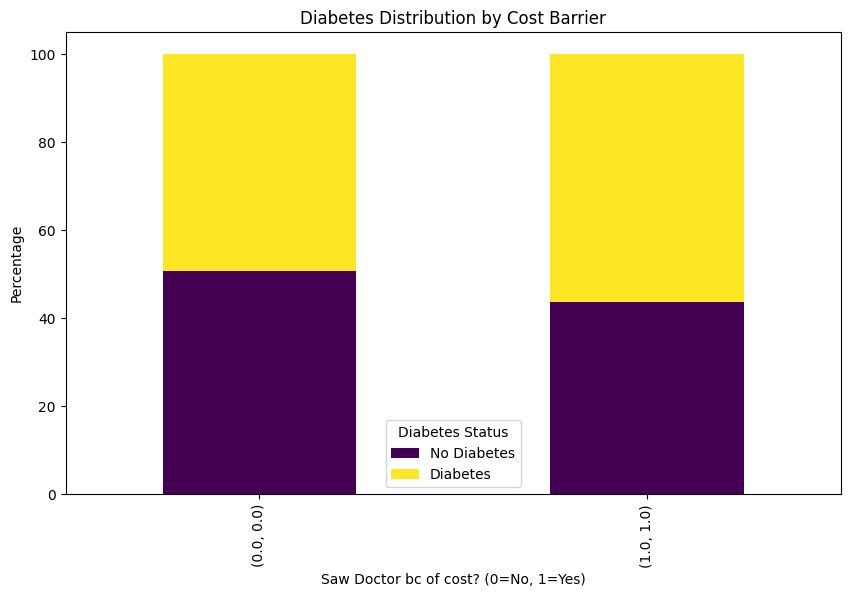

In [22]:
# NoDocBcCost vs Diabetes (Stacked % Bar Plot)
plt.figure(figsize=(10,6))
income_counts = (
    df_brfss.groupby(["nodocbccost", "diabetes_binary"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())  # convert to %
    .unstack()
)

income_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Diabetes Distribution by Cost Barrier")
plt.ylabel("Percentage")
plt.xlabel("Saw Doctor bc of cost? (0=No, 1=Yes)")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.show()

# 2. Interaction

## For Graph 1

In [23]:
# Prepare combined data
coverage_data = df_brfss.groupby('anyhealthcare')['diabetes_binary'].mean() * 100
coverage_df = pd.DataFrame({
    'Category': coverage_data.index.map({0: 'No', 1: 'Yes'}),
    'Diabetes Rate (%)': coverage_data.values,
    'Variable': 'Any Healthcare Coverage'
})

cost_data = df_brfss.groupby('nodocbccost')['diabetes_binary'].mean() * 100
cost_df = pd.DataFrame({
    'Category': cost_data.index.map({0: 'No', 1: 'Yes'}),
    'Diabetes Rate (%)': cost_data.values,
    'Variable': "Didn't See Doctor Due to Cost"
})

combined_df = pd.concat([coverage_df, cost_df])

selected_region = alt.selection_point(encodings=['x'])

# Create grouped bar chart
chart = alt.Chart(combined_df).mark_bar().encode(
    x=alt.X('Category:N', title='Response'),
    y=alt.Y('Diabetes Rate (%):Q', title='Diabetes Rate (%)'),
    color=alt.Color('Variable:N', title='Healthcare Factor', scale=alt.Scale(scheme='category10')),
    xOffset='Variable:N',
    tooltip=[
        alt.Tooltip('Variable:N', title='Factor'),
        alt.Tooltip('Category:N', title='Response'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
).properties(
    width=400,
    height=400,
    title='Healthcare Access and Diabetes Rates'
).add_params(
    selected_region
)

# Add text labels
text = chart.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=11
).encode(
    text=alt.Text('Diabetes Rate (%):Q', format='.2f')
)

final_chart = (chart + text)
final_chart

alt.LayerChart(...)

In [24]:
selected_region1 = alt.selection_point(encodings=['x'])
selected_region2 = alt.selection_point(encodings=['x'])

# COVERAGE
coverage_data = df_brfss.groupby('anyhealthcare')['diabetes_binary'].mean() * 100
coverage_df = pd.DataFrame({
    'Response': coverage_data.index.map({0: 'No', 1: 'Yes'}),
    'Diabetes Rate (%)': coverage_data.values,
    'Variable': 'Any Healthcare Coverage'
})

coverage = alt.Chart(coverage_df).mark_bar().encode(
    x='Response:N',
    y='Diabetes Rate (%):Q',
    color=alt.condition(selected_region1, alt.ColorValue("#a64a47"), alt.ColorValue("grey")),
    tooltip=[
        alt.Tooltip('Variable:N', title='Factor'),
        alt.Tooltip('Response:N', title='Response'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
).properties(
    width=400,
    height=400,
    title='Any Healthcare Coverage'
).add_params(selected_region1)

# Add text labels
cov_text = coverage.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=11
).encode(
    text=alt.Text('Diabetes Rate (%):Q', format='.2f')
)

# COST
cost_data = df_brfss.groupby('nodocbccost')['diabetes_binary'].mean() * 100
cost_df = pd.DataFrame({
    'Response': cost_data.index.map({0: 'No', 1: 'Yes'}),
    'Diabetes Rate (%)': cost_data.values,
    'Variable': "Didn't See Doctor Due to Cost"
})

cost = alt.Chart(cost_df).mark_bar().encode(
    x='Response:N',
    y='Diabetes Rate (%):Q',
    color=alt.condition(selected_region2, alt.ColorValue("#a64a47"), alt.ColorValue("grey")),
    tooltip=[
        alt.Tooltip('Variable:N', title='Factor'),
        alt.Tooltip('Response:N', title='Response'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
).properties(
    width=400,
    height=400,
    title='Cost Barrier to Doctor'
).add_params(selected_region2)

# Add text labels
covtext = coverage.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=11
).encode(
    text=alt.Text('Diabetes Rate (%):Q', format='.2f')
)

costext = cost.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=11
).encode(
    text=alt.Text('Diabetes Rate (%):Q', format='.2f')
)

coverage_chart = coverage + covtext
cost_chart = cost + costext
coverage_chart | cost_chart

alt.HConcatChart(...)

## FINAL: Graph 1  - Coverage & Cost vs Diabetes

In [25]:
selected_region1 = alt.selection_point(encodings=['x'])
selected_region2 = alt.selection_point(encodings=['x'])

# COVERAGE
coverage_data = df_brfss.groupby('anyhealthcare')['diabetes_binary'].mean() * 100
coverage_df = pd.DataFrame({
    'Response': coverage_data.index.map({0: 'No', 1: 'Yes'}),
    'Diabetes Rate (%)': coverage_data.values,
    'Variable': 'Any Healthcare Coverage'
})

coverage = alt.Chart(coverage_df).mark_bar().encode(
    x='Response:N',
    y='Diabetes Rate (%):Q',
    color=alt.condition(selected_region1, alt.ColorValue("#a64a47"), alt.ColorValue("grey")),
    tooltip=[
        alt.Tooltip('Variable:N', title='Factor'),
        alt.Tooltip('Response:N', title='Response'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
).properties(
    width=400,
    height=400,
    title='Any Healthcare Coverage'
).add_params(selected_region1)

# Add text labels
cov_text = coverage.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=11
).encode(
    text=alt.Text('Diabetes Rate (%):Q', format='.2f')
)

# COST
cost_data = df_brfss.groupby('nodocbccost')['diabetes_binary'].mean() * 100
cost_df = pd.DataFrame({
    'Response': cost_data.index.map({0: 'No', 1: 'Yes'}),
    'Diabetes Rate (%)': cost_data.values,
    'Variable': "Didn't See Doctor Due to Cost"
})

cost = alt.Chart(cost_df).mark_bar().encode(
    x= alt.X('Response:N'),
    y= alt.Y('Diabetes Rate (%):Q'),
    color=alt.condition(selected_region2, alt.ColorValue("#a64a47"), alt.ColorValue("grey")),
    tooltip=[
        alt.Tooltip('Variable:N', title='Factor'),
        alt.Tooltip('Response:N', title='Response'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
).properties(
    width=400,
    height=400,
    title='Cost Barrier to Doctor'
).add_params(selected_region2)

# Add text labels
covtext = coverage.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=11
).encode(
    text=alt.Text('Diabetes Rate (%):Q', format='.2f')
)

costext = cost.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=11
).encode(
    text=alt.Text('Diabetes Rate (%):Q', format='.2f')
)

coverage_chart = coverage + covtext
cost_chart = cost + costext
#coverage_chart | cost_chart

final_chart = (coverage_chart | cost_chart).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
)

final_chart

alt.HConcatChart(...)

##  For Graph 2

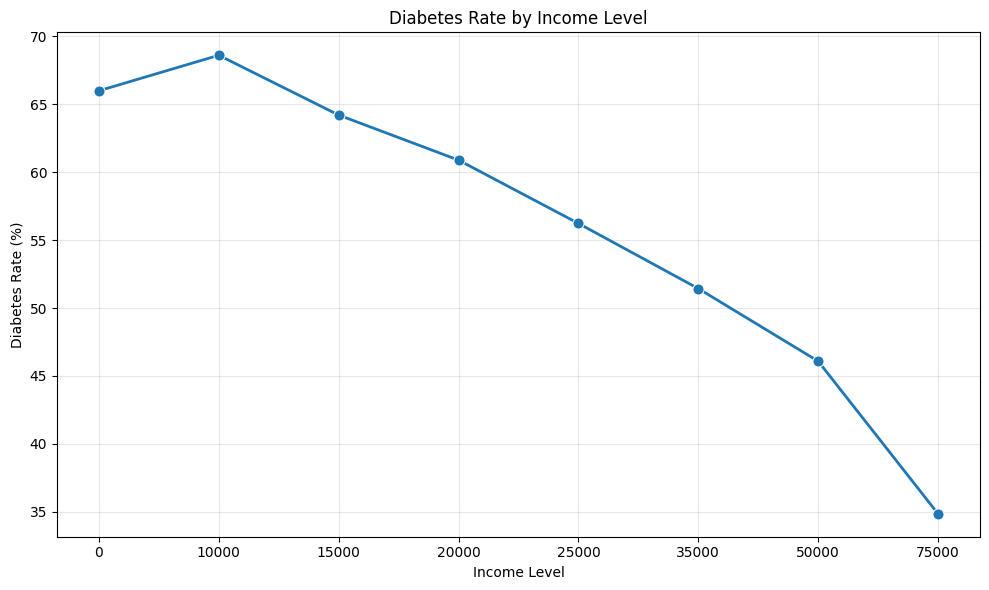

In [26]:
# STATIC
plt.figure(figsize=(10,6))
diabetes_rate = df_brfss.groupby("income")["diabetes_binary"].mean() * 100

ax = sns.lineplot(x=diabetes_rate.index, y=diabetes_rate.values, marker='o', linewidth=2, markersize=8)
ax.set_xticks([1,2,3,4,5,6,7,8])
ax.set_xticklabels(['0','10000','15000','20000','25000','35000','50000','75000'])
plt.title("Diabetes Rate by Income Level")
plt.ylabel("Diabetes Rate (%)")
plt.xlabel("Income Level")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## FINAL: Graph 2 - Income vs Diabetes Rate, Needs Legend

In [27]:
# INCOME 
income_data = df_brfss.groupby('income')['diabetes_binary'].mean() * 100
income_df = pd.DataFrame({
    'Income Level ($)': income_data.index,
    'Diabetes Rate (%)': income_data.values
})

income = alt.Chart(income_df).mark_line(
    point=alt.OverlayMarkDef(size=150, color='#411312'), 
    color='#a64a47',
    strokeWidth=3
).encode(
    x=alt.X('Income Level ($):Q', 
            title='Income Level (1=Lowest, 8=Highest)',
            axis=alt.Axis(tickCount=8)),
    y=alt.Y('Diabetes Rate (%):Q', 
            title='Diabetes Rate (%)'),
    tooltip=[
        alt.Tooltip('Income Level ($):Q', title='Income'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
).properties(
    width=1000,
    height=400,
    title='Diabetes Rate by Income Level',
).configure_view(
    strokeWidth=0
).interactive()

income_chart = income.configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
)

income_chart

alt.Chart(...)

##  Final: Graph 3 - Rate of coverage ownership by income level

In [28]:
# no coverage vs income
no_coverage = df_brfss[df_brfss['anyhealthcare'] == 0]
coverageincome_data = (
    no_coverage.groupby('income').size() / 
    df_brfss.groupby('income').size() * 100
)
coverageincome_df = pd.DataFrame({
    'Income Level ($)': coverageincome_data.index,
    'Persons Lacking Coverage (%)': coverageincome_data.values
})

coverageincome = alt.Chart(coverageincome_df).mark_line(
    point=alt.OverlayMarkDef(size=150, color='#637569'), 
    color='#71F59F',
    strokeWidth=3
).encode(
    x=alt.X('Income Level ($):Q', 
            title='Income Level (1=Lowest, 8=Highest)',
            axis=alt.Axis(tickCount=8)),
    y=alt.Y('Persons Lacking Coverage (%):Q', 
            title='Persons Lacking Coverage (%)'),
    tooltip=[
        alt.Tooltip('Income Level ($):Q', title='Income'),
        alt.Tooltip('Persons Lacking Coverage (%):Q', title='Persons Lacking Coverage (%)', format='.2f')
    ]
).properties(
    width=1000,
    height=400,
    title='Lack of Coverage at each Income Level',
).configure_view(
    strokeWidth=0
).interactive()

coverageincome_chart = coverageincome.configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
)

coverageincome_chart

alt.Chart(...)

## FINAL: Graph 4 - Basically 2+3

In [29]:
# INCOME - Diabetes Rate
income_data = df_brfss.groupby('income')['diabetes_binary'].mean() * 100
income_df = pd.DataFrame({
    'Income Level': income_data.index,
    'Diabetes Rate (%)': income_data.values
})

# No coverage vs income
no_coverage = df_brfss[df_brfss['anyhealthcare'] == 0]
coverageincome_data = (
    no_coverage.groupby('income').size() / 
    df_brfss.groupby('income').size() * 100
)
coverageincome_df = pd.DataFrame({
    'Income Level': coverageincome_data.index,
    'Persons Lacking Coverage (%)': coverageincome_data.values
})

# Chart 1: Diabetes Rate
base = alt.Chart(income_df).mark_line(
    point=alt.OverlayMarkDef(size=150, color="#a64a47"), 
    color="#ff5c56",
    strokeWidth=3
).encode(
    x=alt.X('Income Level:Q', 
            title='Income Level (1=Lowest, 8=Highest)',
            axis=alt.Axis(tickCount=8)),
    y=alt.Y('Diabetes Rate (%):Q', 
            title='Diabetes Rate (%)',
            axis=alt.Axis(titleColor='#a64a47')),
    tooltip=[
        alt.Tooltip('Income Level:Q', title='Income Level'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
)

# Chart 2: Coverage Rate (with independent y-axis)
coverage_line = alt.Chart(coverageincome_df).mark_line(
    point=alt.OverlayMarkDef(size=150, color="#196B34"), 
    color='#71F59F',
    strokeWidth=3
).encode(
    x=alt.X('Income Level:Q'),
    y=alt.Y('Persons Lacking Coverage (%):Q',
            title='Persons Lacking Coverage (%)',
            axis=alt.Axis(titleColor='#196B34')),
    tooltip=[
        alt.Tooltip('Income Level:Q', title='Income Level'),
        alt.Tooltip('Persons Lacking Coverage (%):Q', title='Lack of Coverage (%)', format='.2f')
    ]
)

# Layer with dual axis
layered_chart = alt.layer(base, coverage_line).resolve_scale(
    y='independent'
).properties(
    width=1000,
    height=400,
    title='Diabetes Rate and Healthcare Coverage by Income Level'
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).interactive()

layered_chart

alt.LayerChart(...)

In [42]:
# Create access barrier variable (0, 1, or 2 barriers)
df_brfss['access_barriers'] = 0
df_brfss.loc[df_brfss['anyhealthcare'] == 0, 'access_barriers'] += 1
df_brfss.loc[df_brfss['nodocbccost'] == 1, 'access_barriers'] += 1

print(df_brfss['access_barriers'].value_counts())

access_barriers
0    62116
1     7329
2     1247
Name: count, dtype: int64


In [ ]:
# Calculate diabetes rate for each barrier level
barrier_data = df_brfss.groupby('access_barriers')['diabetes_binary'].mean() * 100
barrier_df = pd.DataFrame({
    'Access Barriers': barrier_data.index.map({0: '0 Barriers', 1: '1 Barrier', 2: '2 Barriers'}),
    'Diabetes Rate (%)': barrier_data.values
})

access_barriers
0    49.586258
1    53.568017
2    49.639134
Name: diabetes_binary, dtype: float64

In [43]:
# Create donut chart
donut = alt.Chart(barrier_df).mark_arc(innerRadius=80, outerRadius=150).encode(
    theta=alt.Theta('Diabetes Rate (%):Q'),
    color=alt.Color('Access Barriers:N', 
                    legend=alt.Legend(title='Healthcare Access Barriers')),
    tooltip=[
        alt.Tooltip('Access Barriers:N', title='Barriers'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
).properties(
    width=400,
    height=400,
    title='Diabetes Rate by Number of Healthcare Access Barriers'
)

# Add text labels in the center or on slices
text = alt.Chart(barrier_df).mark_text(radius=115, fontSize=14, fontWeight='bold').encode(
    theta=alt.Theta('Diabetes Rate (%):Q', stack='center'),  # center each text on its slice
    text=alt.Text('Diabetes Rate (%):Q', format='.2f'),
    color=alt.value('white')
)

final_donut = (donut + text).configure_view(strokeWidth=0)
final_donut

alt.LayerChart(...)

## FINAL: Graph 5 - Diabetes vs No. of Access Barriers

In [ ]:
import pandas as pd
import altair as alt

barrier_df['Access Barriers'] = pd.Categorical(
    barrier_df['Access Barriers'],
    categories=['0 Barriers', '1 Barrier', '2 Barriers'],
    ordered=True
)

order_map = {'0 Barriers': 0, '1 Barrier': 1, '2 Barriers': 2}
barrier_df['barrier_order'] = barrier_df['Access Barriers'].map(order_map)

donut = alt.Chart(barrier_df).mark_arc(innerRadius=80, outerRadius=150).encode(
    theta=alt.Theta('Diabetes Rate (%):Q', stack=True),
    color=alt.Color('Access Barriers:N',
                    legend=alt.Legend(title='Healthcare Access Barriers'),
                    sort=['0 Barriers', '1 Barrier', '2 Barriers']),
    order=alt.Order('barrier_order:Q', sort='ascending'),
    tooltip=[
        alt.Tooltip('Access Barriers:N', title='Barriers'),
        alt.Tooltip('Diabetes Rate (%):Q', title='Diabetes Rate (%)', format='.2f')
    ]
).properties(
    width=400,
    height=400,
    title='Diabetes Rate by Number of Healthcare Access Barriers'
)

text = alt.Chart(barrier_df).mark_text(radius=115, fontSize=14, fontWeight='bold').encode(
    theta=alt.Theta('Diabetes Rate (%):Q', stack='center'),
    text=alt.Text('Diabetes Rate (%):Q', format='.2f'),
    order=alt.Order('barrier_order:Q', sort='ascending'),
    color=alt.value('white')
)

final_donut = (donut + text).configure_view(strokeWidth=0)
final_donut


alt.LayerChart(...)